# Sentiment Analysis Project
+ Emotion Detection In Text
+ Text Classifier

In [250]:
# Load EDA Pakages
import pandas as pd
import numpy as np

In [251]:
# Load Data Vizualize Pakages
import seaborn as sns

In [252]:
# Load Text Cleaning Pakages
import neattext.functions as nfx

In [253]:
# Load ML Pakages
#Estmators
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [254]:
#Load Dataset 1
dataset1 = pd.read_csv('./data/emotion-dataset.csv')

#Load Dataset 2

dataset2 = pd.read_csv('./data/tweet_emotions.csv')

In [255]:
dataset1.describe()

,Emotion,Text
count,34792,34792
unique,8,31110
top,joy,Yes .
freq,11045,76


In [256]:
dataset1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
34787    False
34788    False
34789    False
34790    False
34791    False
Length: 34792, dtype: bool

In [257]:
dataset1.drop_duplicates()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."


In [258]:
dataset1.duplicated().sum()

3630

In [259]:
dataset2.describe()

,Emotion,Text
count,40000,40000
unique,13,39827
top,neutral,I just received a mothers day card from my lov...
freq,8638,14


In [260]:
dataset2.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
39995    False
39996    False
39997    False
39998    False
39999    False
Length: 40000, dtype: bool

In [261]:
data = pd.concat([dataset1, dataset2], axis=0)
data.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [262]:
data.describe()

,Emotion,Text
count,74792,74792
unique,17,70937
top,sadness,Yes .
freq,11887,76


In [263]:
# Value Counts
data['Emotion'].value_counts()

Emotion
sadness       11887
joy           11045
neutral       10892
worry          8459
surprise       6249
fear           5410
happiness      5209
anger          4407
love           3842
fun            1776
relief         1526
hate           1323
disgust         856
empty           827
enthusiasm      759
boredom         179
shame           146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

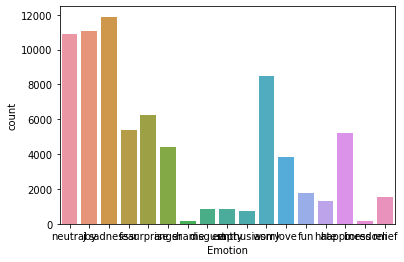

In [264]:
#Plot
sns.countplot(x='Emotion', data= data)

# Data Cleaning


In [265]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [266]:
# User Handles
data['Clean_Text'] =data['Text'].apply(nfx.remove_userhandles)

In [267]:
# Stopwords
data['Clean_Text'] =data['Clean_Text'].apply(nfx.remove_shortwords)

In [268]:
# Remove Special Characters
data['Clean_Text'] =data['Clean_Text'].apply(nfx.remove_special_characters)

In [269]:
# Features & Lables
Xfeatures = data['Clean_Text']
ylabels = data['Emotion']

In [270]:
# Split Data
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.3, random_state=42)

In [271]:
# Build Pipline
from sklearn.pipeline import Pipeline

In [272]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Logistic Regression Classifier
lr_classifier = LogisticRegression()

# Naive Bayes Classifier
nb_classifier = MultinomialNB()



In [273]:
# Naive Bayes Pipeline
pipe_nb = Pipeline(steps=[('cv', CountVectorizer()),('nb', nb_classifier)])

# LogisticRegression Pipeline
pipe_lr =Pipeline(steps=[('cv', CountVectorizer()),('lr', lr_classifier)])

# Decision Tree Pipeline
pipe_dt = Pipeline(steps=[('cv', CountVectorizer()),('dt', dt_classifier)]) 



In [274]:
# Train and Fit Data
pipe_lr.fit(x_train, y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [275]:
pipe_nb.fit(x_train, y_train)
#pipe_dt.fit(x_train, y_train)


Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())])

In [276]:
pipe_dt.fit(x_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('dt', DecisionTreeClassifier())])

In [277]:
# Check Accuracy - LogisticRegression
pipe_lr.score(x_test, y_test)


0.4042249754880114

In [278]:
#Check Accuracy - Naive Bayes
pipe_nb.score(x_test, y_test)

0.3598805597646849

In [279]:
# Check Accuracy - Decision Tree
pipe_dt.score(x_test, y_test)

0.3162937873250735

In [280]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"

In [281]:
#LogisticRegression Prediction
pipe_lr.predict([ex1])


array(['joy'], dtype=object)

In [282]:
# Naive Bayes Prediction
pipe_nb.predict([ex1])

array(['joy'], dtype='<U10')

In [283]:
# Decision Tree Prediction
pipe_dt.predict([ex1])

array(['joy'], dtype=object)

In [284]:
# Prediction Probability - LogisticRegression
pipe_lr.predict_proba([ex1])

array([[2.86225209e-03, 8.09101315e-04, 3.43888880e-03, 8.14795738e-04,
        9.04266258e-03, 1.37393363e-03, 6.71946822e-03, 2.01437556e-01,
        1.19443929e-03, 4.03651753e-01, 2.10195402e-01, 5.05685864e-02,
        1.82390609e-02, 1.12057658e-02, 2.10410573e-04, 5.99892417e-02,
        1.82466818e-02]])

In [285]:
# Prediction Probability - Decision Tree
pipe_dt.predict_proba([ex1])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0.]])

In [286]:
# Prediction Probability - Naive Bayes
pipe_nb.predict_proba([ex1])

array([[1.62684462e-04, 7.42053338e-09, 3.07237970e-06, 2.31245654e-07,
        7.48689014e-06, 5.87641536e-05, 2.45855194e-04, 1.27916564e-01,
        4.23833460e-06, 6.49159122e-01, 5.81015049e-02, 8.08442902e-02,
        3.00121615e-04, 4.18430170e-02, 3.13907903e-09, 1.81328213e-02,
        2.32202148e-02]])

In [287]:
# To Know the classes - Logistic Regression
pipe_lr.classes_

array(['anger', 'boredom', 'disgust', 'empty', 'enthusiasm', 'fear',
       'fun', 'happiness', 'hate', 'joy', 'love', 'neutral', 'relief',
       'sadness', 'shame', 'surprise', 'worry'], dtype=object)

In [288]:
# To Know the classes - Decision Tree
pipe_dt.classes_

array(['anger', 'boredom', 'disgust', 'empty', 'enthusiasm', 'fear',
       'fun', 'happiness', 'hate', 'joy', 'love', 'neutral', 'relief',
       'sadness', 'shame', 'surprise', 'worry'], dtype=object)

In [289]:
# To Know the classes - Naive Bayes
pipe_nb.classes_

array(['anger', 'boredom', 'disgust', 'empty', 'enthusiasm', 'fear',
       'fun', 'happiness', 'hate', 'joy', 'love', 'neutral', 'relief',
       'sadness', 'shame', 'surprise', 'worry'], dtype='<U10')

In [290]:
# Save Model & Pipeline
import joblib
pipline_file = open("emotion_classifier_pipe_lr_18_june_2023.pkl", "wb")
joblib.dump(pipe_lr, pipline_file)
pipline_file.close()

pipline_file_nb = open("emotion_classifier_pipe_nb_19_june_2023.pkl", "wb")
joblib.dump(pipe_nb, pipline_file_nb)
pipline_file_nb.close()

pipline_file_dt = open("emotion_classifier_pipe_dt_19_june_2023.pkl", "wb")
joblib.dump(pipe_dt, pipline_file_dt)
pipline_file_dt.close()